In [5]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
!pip install pims
import pims
import moviepy
import imageio
from skimage.color import rgb2gray
from skimage.morphology import (erosion, 
                                dilation, 
                                opening, 
                                closing,
                                disk,
                                diamond,
                                ball,
                                rectangle)
from skimage.transform import (hough_line,
                               hough_line_peaks,
                               probabilistic_hough_line)
from skimage.filters import threshold_otsu
from scipy import ndimage as ndi

In [7]:
def imshow(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [33]:
v = pims.Video('/content/video.mp4')
print(v)
print(v.frame_rate)
print(v.frame_shape)
print(f"El video dura {(v.sizes['t'] / v.frame_rate) / 60:.2f} min")

<FramesSequenceND>
Axes: 3
Axis 'x' size: 1280
Axis 'y' size: 720
Axis 't' size: 3079
Pixel Datatype: uint8
29.97
(720, 1280, 3)
El video dura 1.71 min


Frame([[[149, 126, 129],
        [149, 126, 129],
        [152, 129, 132],
        ...,
        [132, 121, 127],
        [135, 124, 130],
        [137, 126, 132]],

       [[119,  96,  99],
        [119,  96,  99],
        [121,  98, 101],
        ...,
        [132, 121, 127],
        [135, 124, 130],
        [137, 126, 132]],

       [[ 96,  73,  76],
        [ 96,  73,  76],
        [ 97,  74,  77],
        ...,
        [132, 121, 127],
        [135, 124, 130],
        [137, 126, 132]],

       ...,

       [[140,  90,  86],
        [137,  87,  83],
        [130,  80,  76],
        ...,
        [ 90,  50,  53],
        [ 90,  50,  53],
        [ 90,  50,  53]],

       [[139,  89,  85],
        [136,  86,  82],
        [130,  80,  76],
        ...,
        [ 91,  51,  54],
        [ 90,  50,  53],
        [ 90,  50,  53]],

       [[139,  89,  85],
        [136,  86,  82],
        [130,  80,  76],
        ...,
        [ 91,  51,  54],
        [ 91,  51,  54],
        [ 91,  51,  54]]], dtype=uint8)
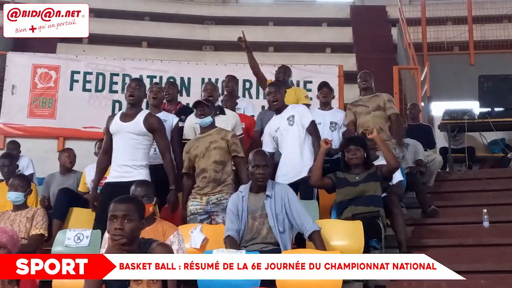

In [81]:
v[400]

In [82]:
image = rgb2gray(v[400])

In [51]:
np.min(image)

0.0

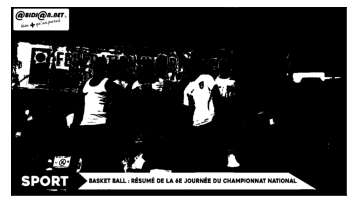

In [52]:
imshow(image > 0.8)

0.96484375


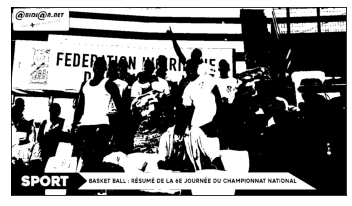

In [83]:
local_otsu = threshold_otsu(image)
print(2 * local_otsu)
thresh = image > local_otsu # Por 2 para ser más estrictos
imshow(thresh)

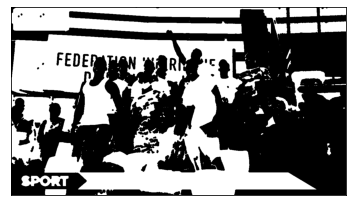

In [84]:
# Suavizamos una imagen con una closing
frame = closing(thresh, disk(3))
imshow(frame)

[0 0 0 ... 3 3 3]
[498746  75488   4187   3515      2   3634      1   3922    410      1
 116612      2      1      2 162122      1      1    218      5      1
      2      2      2     15    301     29     19    124      3      1
     14    149   1817      9     14     16      6      1    241      7
      3      1      1      5      2   7555    132     44      7    135
      2      2      5      6      1    190     14      1     21      1
     48      1     31      7      1      1      1      1      6    265
      1      3      1    150     12    810     16      7      4      1
      1      1     25      1      2    127      1     25      2      5
      1      4      1      1      8      2      1      3      1    176
      1      8   1468      6  28693      5     52      1      1      1
      1      1     26      6      1      2      4      1      2      2
      2      2     28      2      2      1      6      1      1     66
      8      2      1      3     21      2      4      1   

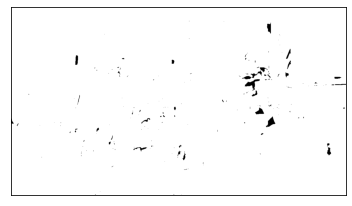

In [96]:
# Etiquetamos el número los pixeles según zonas segmentadas
label_object, name_labels = ndi.label(frame)
print(label_object[1, :])
# Contamos num pixeles en zona segmentada
sizes = np.bincount((label_object.ravel()))
print(sizes)
mask_sizes = (sizes > 1000)
print(mask_sizes.shape)
frame_cleaned = mask_sizes[label_object]
imshow(frame_cleaned)

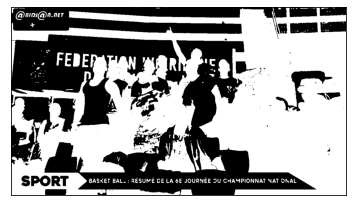

In [97]:
# Restamos la imagen limpiada, quitamos las segmentaciones grnades
imshow(opening(thresh^frame_cleaned, disk(1)))